# Import Data

In [5]:
from google.colab import files
uploaded = files.upload()

Saving human_resources.csv to human_resources.csv


In [9]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['human_resources.csv']))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Statistika Deskriptif

## Mean

In [11]:
df_monthly_hours = df['average_montly_hours']
df_monthly_hours.mean()

201.0503366891126

## Median

In [12]:
df_monthly_hours = df['average_montly_hours']
df_monthly_hours.median()

200.0

## Mode

In [13]:
df_monthly_hours = df['average_montly_hours']
df_monthly_hours.mode()

0    135
1    156
Name: average_montly_hours, dtype: int64

In [14]:
df_monthly_hours.value_counts()

135    153
156    153
149    148
151    147
160    136
      ... 
297      7
288      6
299      6
96       6
303      6
Name: average_montly_hours, Length: 215, dtype: int64

## Range

In [15]:
df_monthly_hours = df['average_montly_hours']
df_monthly_hours.max() - df_monthly_hours.min()

214

## Variance and Standard Deviation

In [16]:
df_monthly_hours = df['average_montly_hours']

In [17]:
# Variance
df_monthly_hours.var()

2494.313174809956

In [18]:
# Standard Deviation
df_monthly_hours.std()

49.94309937128408

#Interquartile

In [19]:
df_monthly_hours.quantile(0.75) - df_monthly_hours.quantile(0.25)

89.0

## Outliers

In [20]:
def get_outliers(df):

    # Menghitung 25th dan 75th percentile
    p75 = df.quantile(0.75)
    p25 = df.quantile(0.25)
    # Menghitung IQR dengan selisih 25th dan 75th percentile
    iqr = p75 - p25

    # "Minimum non-outlier value": 25th percentile - 1.5 * IQR
    min_val = p25 - 1.5*iqr
    # "Maximum non-outlier value": 75th percentile + 1.5 * IQR
    max_val = p75 + 1.5*iqr

    # Apapun dibawah minimum atau diatas maximum, disebut sebagai outlier
    outliers = df[(df < min_val) | (df > max_val)]
    return outliers

In [21]:
get_outliers(df_monthly_hours)

Series([], Name: average_montly_hours, dtype: int64)

# Distribusi Data

In [22]:
import matplotlib
import matplotlib.pyplot as plt

(array([3244., 6443., 2557., 1473.,    0.,  718.,  188.,  162.,    0.,
         214.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

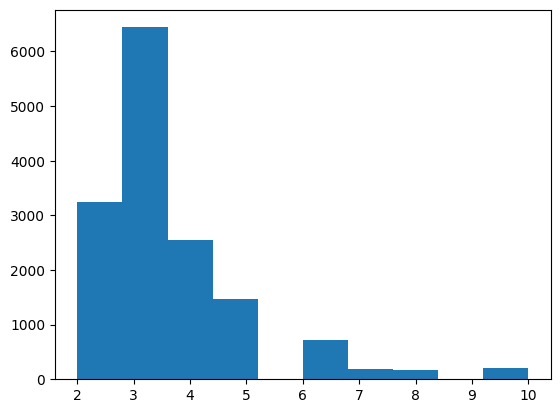

In [23]:
plt.hist(df['time_spend_company'])

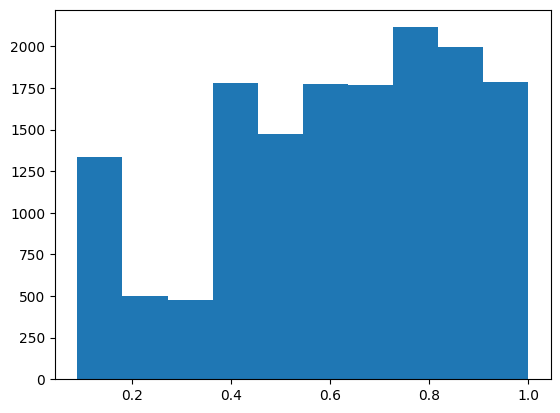

In [24]:
plt.hist(df['satisfaction_level'])
plt.show()

# Korelasi

In [25]:
import seaborn as sns

In [26]:
from sklearn import datasets
iris = datasets.load_iris()
iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


from matplotlib import pyplot as plt
_df_0['sepal length (cm)'].plot(kind='hist', bins=20, title='sepal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sepal width (cm)'].plot(kind='hist', bins=20, title='sepal width (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['petal length (cm)'].plot(kind='hist', bins=20, title='petal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='sepal width (cm)', y='petal length (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal width (cm)']
  ys = series['sepal length (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('sepal length (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal width (cm)']
  ys = series['sepal width (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('sepal width (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal width (cm)']
  ys = series['petal length (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('petal length (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['petal width (cm)']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'petal width (cm)'}, axis=1)
              .sort_values('petal width (cm)', ascending=True))
  xs = counted['petal width (cm)']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['sepal length (cm)'].plot(kind='line', figsize=(8, 4), title='sepal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['sepal width (cm)'].plot(kind='line', figsize=(8, 4), title='sepal width (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['petal length (cm)'].plot(kind='line', figsize=(8, 4), title='petal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## Heatmap

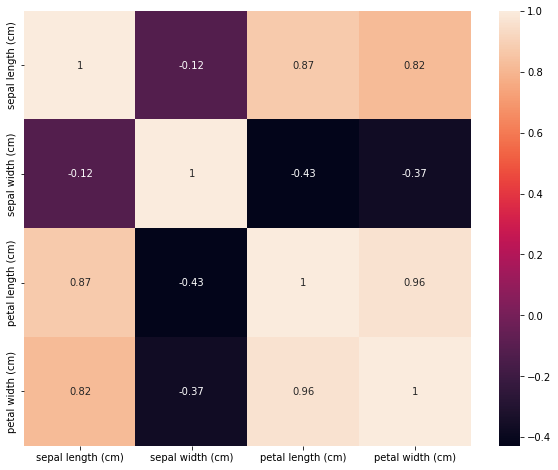

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(iris.corr(),annot=True)
plt.show()

## Regplot

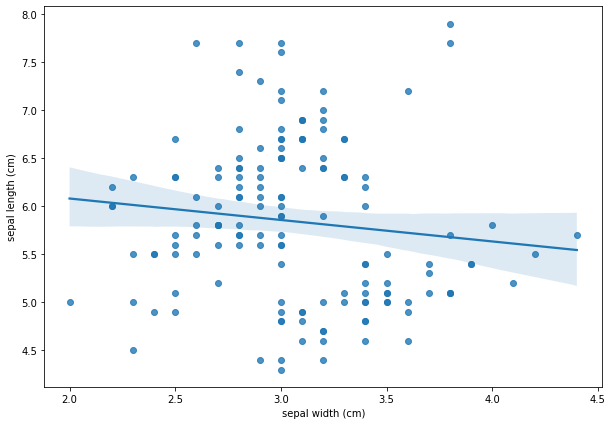

In [ ]:
plt.figure(figsize = (10,7))
sns.regplot(x='sepal width (cm)',y='sepal length (cm)', data = iris)
plt.show()

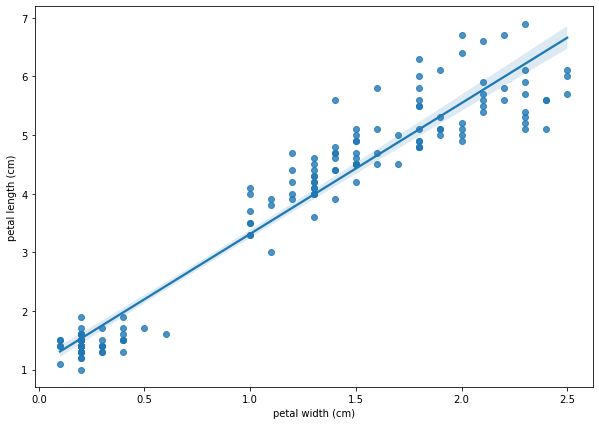

In [ ]:
plt.figure(figsize = (10,7))
sns.regplot(x='petal width (cm)',y='petal length (cm)',data = iris)
plt.show()

## Heatmap for HR Analytics

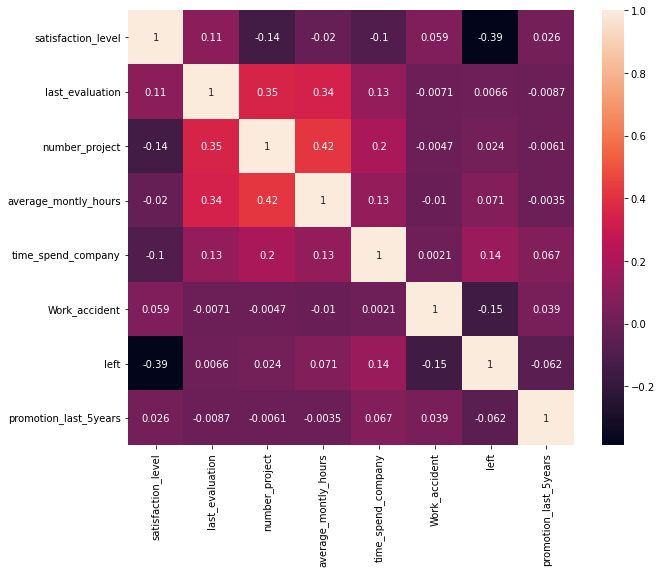

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()